In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.patches as patches
import geopandas as gpd
from highlight_text import fig_text, ax_text
from pyfonts import load_font

In [2]:
df = pd.read_csv("my_books.csv")

In [3]:
df.head(2)

,title,author,iso_3,length,genre
0,The Silo Saga,Hugh Howey,USA,1663,science-fiction
1,Homeland,Fernando Aramburu,SPN,585,literature


In [4]:
# Define width and height for the rectangles
def width_height(length):
    if length > 1000:
        return 0.05, 0.9,
    elif 750 <= length <= 1000:
        return 0.04, 0.8,
    elif 500 <= length <= 750:
        return 0.03, 0.7,
    elif 250 <= length <= 500:
        return 0.025, 0.6,
    else:
        return 0.02, 0.55

In [5]:
df[["w", "h"]] = df.apply(lambda row: pd.Series(width_height(row["length"])), axis=1)

In [6]:
df["y"] = 0.1

In [7]:
df.head()

,title,author,iso_3,length,genre,w,h,y
0,The Silo Saga,Hugh Howey,USA,1663,science-fiction,0.050,0.9,0.1
1,Homeland,Fernando Aramburu,SPN,585,literature,0.030,0.7,0.1
2,The Dovekeepers,Alice Hoffman,USA,555,literature,0.030,0.7,0.1
3,The Secret Life of Sunflowers,Marta Molnar,USA,356,literature,0.025,0.6,0.1
4,The God of the Woods,Liz Moore,USA,490,literature,0.025,0.6,0.1


In [8]:
color_mapping = {
    "biography":"#e7ab93",
    "history":"#121f20",
    "literature":"#31635c",
    "mystery":"#df421a",
    "science-fiction":"#2a8ba8"
}
df["color"] = df["genre"].map(color_mapping)

In [9]:
# Create dataframes and labels
total_length = df.length.sum()
nra = df.author.nunique()
nrb = df.title.value_counts().sum()
nrc = df.iso_3.nunique()
nrg = df.genre.value_counts().reset_index()
nrg["color"] = nrg["genre"].map(color_mapping)
nrp = df.groupby("genre")["length"].sum().reset_index()
nrp = nrp.sort_values(by="length", ignore_index=True)
nrp["color"] = nrp["genre"].map(color_mapping)

In [10]:
# Split dataframe for the 2 shelves
df1 = df.iloc[0:19]
df2 = df.iloc[19: ]

In [11]:
df1.head(2) # 0.03

,title,author,iso_3,length,genre,w,h,y,color
0,The Silo Saga,Hugh Howey,USA,1663,science-fiction,0.05,0.9,0.1,#2a8ba8
1,Homeland,Fernando Aramburu,SPN,585,literature,0.03,0.7,0.1,#31635c


In [12]:
df2.head(2) #0.01

,title,author,iso_3,length,genre,w,h,y,color
19,Underworld,Don DeLillo,USA,833,literature,0.04,0.8,0.1,#31635c
20,A Little Life,Hanya Yanagihara,USA,737,literature,0.03,0.7,0.1,#31635c


In [13]:
df1 = df1.copy()

In [14]:
# Calculate x values for the rectangles on the lower shelf
def calculate_x1(df):    
    x = [0.1]    
    for i in range(1, len(df)):        
        x.append(x[i-1] + df['w'].iloc[i-1])    
    df.loc[:, 'x'] = x
    return df
    
df1 = calculate_x1(df1)

In [15]:
df2 = df2.copy()

In [16]:
# Calculate x values for the rectangles on the higher shelf
def calculate_x2(df):    
    x = [0.3]     
    for i in range(1, len(df)):        
        x.append(x[i-1] + df['w'].iloc[i-1])     
    df.loc[:, 'x'] = x
    return df

df2 = calculate_x2(df2)

In [17]:
df1.head(2)

,title,author,iso_3,length,genre,w,h,y,color,x
0,The Silo Saga,Hugh Howey,USA,1663,science-fiction,0.05,0.9,0.1,#2a8ba8,0.10
1,Homeland,Fernando Aramburu,SPN,585,literature,0.03,0.7,0.1,#31635c,0.15


In [18]:
df2.head(2)

,title,author,iso_3,length,genre,w,h,y,color,x
19,Underworld,Don DeLillo,USA,833,literature,0.04,0.8,0.1,#31635c,0.30
20,A Little Life,Hanya Yanagihara,USA,737,literature,0.03,0.7,0.1,#31635c,0.34


In [19]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/world/world.geojson"
world = gpd.read_file(url)
world = world[world["name"] != "Antarctica"]

In [20]:
# Dataframe for the framed map
author_bc = world.merge(
    df,
    left_on="code_adm", 
    right_on="iso_3" 
)

In [21]:
# images
armchair = mpimg.imread("armchair.png")
armchair = np.array(armchair)

wooden_pot_cropped = mpimg.imread("wooden_pot_cropped.png")
wooden_pot_cropped = np.array(wooden_pot_cropped)

lilac_pot_cropped = mpimg.imread("lilac_pot_cropped.png")
lilac_pot_cropped = np.array(lilac_pot_cropped)

carpet = mpimg.imread("carpet.png")
carpet = np.array(carpet)

frame4_cropped = mpimg.imread("frame4_cropped.png")
frame4_cropped = np.array(frame4_cropped)

frame2_cropped = mpimg.imread("frame2_cropped.png")
frame2_cropped = np.array(frame2_cropped)

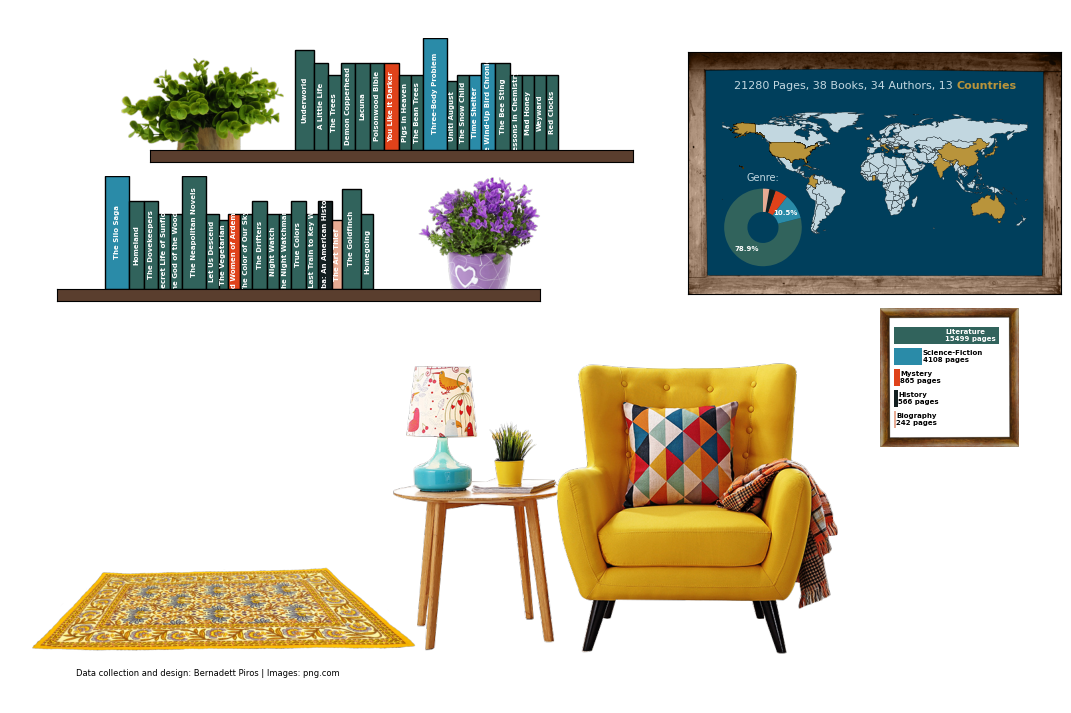

In [22]:
fig, ax = plt.subplots(figsize=(12, 9))

child_ax1 = ax.inset_axes([0.4, 0, 0.5, 0.6])
child_ax1.imshow(armchair)
child_ax1.axis("off")

# Axes for lower shelf
child_ax2 = ax.inset_axes([0.05, 0.58, 0.52, 0.18])
child_ax2.axis("off")

# Axes for higher shelf
child_ax3 = ax.inset_axes([0.15, 0.78, 0.52, 0.18])
child_ax3.axis("off")

child_ax4 = ax.inset_axes([0, -0.05, 0.45, 0.4])
child_ax4.imshow(carpet)
child_ax4.axis("off")

# Axes for map
child_ax5 = ax.inset_axes([0.58, 0.59, 0.7, 0.35])
child_ax5.imshow(frame4_cropped)  
child_ax5.set_facecolor("#003f5c")
child_ax5.set_xticks([])
child_ax5.set_yticks([])
child_ax5.tick_params(length=0)
ax_text(1076, 200, f"{total_length} Pages, {nrb} Books, {nra} Authors, {nrc} <Countries>", 
        size=8, color="#c2d7e0", ha="center", va="center",
        ax=child_ax5,
        highlight_textprops=[
            {"color": "#b9943b", "weight":"bold"}]            
        )

# Axes for bar chart
child_ax6 = ax.inset_axes([0.91, 0.37, 0.2, 0.2])
child_ax6.imshow(frame2_cropped)
child_ax6.axis("off")

grandchild_ax1 = child_ax2.inset_axes([0.67, 0, 0.4, 1.02])
grandchild_ax1.imshow(lilac_pot_cropped)
grandchild_ax1.axis("off")

grandchild_ax2 = child_ax3.inset_axes([-0.09, 0, 0.4, 1])
grandchild_ax2.imshow(wooden_pot_cropped)
grandchild_ax2.axis("off")

# Lower shelf
grandchild_ax3 = child_ax2.inset_axes([0, 0, 1, 0.1])
grandchild_ax3.set_facecolor("#5A3E2E")
grandchild_ax3.set_xticks([])
grandchild_ax3.set_yticks([])
grandchild_ax3.tick_params(length=0)

# Higher shelf
grandchild_ax4 = child_ax3.inset_axes([0, 0, 1, 0.1])
grandchild_ax4.set_facecolor("#5A3E2E")
grandchild_ax4.set_xticks([])
grandchild_ax4.set_yticks([])
grandchild_ax4.tick_params(length=0)

# Map
grandchild_ax5 = child_ax5.inset_axes([0.05, 0, 0.9, 1])
world.plot(ax=grandchild_ax5, color="#c2d7e0", ec="black", lw=0.2)
author_bc.plot(color="#b9943b", ec="black", lw=0.2, ax=grandchild_ax5)
grandchild_ax5.set_facecolor("#c2d7e0")
grandchild_ax5.axis("off")

# Pie
grandchild_ax6 = child_ax5.inset_axes([0.05, 0.075, 0.3, 0.4])
wedges, texts, autotexts = grandchild_ax6.pie(nrg["count"],
        labels=None,
        colors=nrg["color"],
        autopct="%1.1f%%",
        pctdistance=0.7,
        startangle=90,        
        wedgeprops={"width": 0.6},
        textprops={"fontsize":5, "weight":"bold"})
for wedge, label, value, autotext in zip(wedges, nrg["genre"], nrg["count"], autotexts):
        if value < 4:
            autotext.set_text("")  
        else:
            autotext.set_color("white")
grandchild_ax6.set_title("Genre:", y=0.89, fontsize=7, color="#c2d7e0")

# Bar
grandchild_ax7 = child_ax6.inset_axes([0.1, 0.1, 0.8, 0.8])
for i, row in nrp.iterrows():
    genre = row["genre"]
    length = row["length"]
    color = row["color"]
    grandchild_ax7.barh(i, length, color=color)  
    offset = 100 if length < 4500 else -8000
    text_color = "black" if length < 4500 else "white"
    grandchild_ax7.text(x=length + offset, y=i, 
                   s=f"{genre.title()}\n{length} pages", 
                   va="center", size=5, weight="bold", color=text_color)
grandchild_ax7.set_xticks([])
grandchild_ax7.set_yticks([])
grandchild_ax7.tick_params(length=0)
grandchild_ax7.axis("off")

# Add books to lower shelf
for idx, row in df1.iterrows():
    my_rectangle = patches.Rectangle(
        xy=(row['x'], row['y']),
        width=row['w'],
        height=row['h'],
        facecolor=row['color'],
        edgecolor="black"
    )
    child_ax2.add_patch(my_rectangle)

    # Add book titles from df1
    child_ax2.text(
        row['x'] + row['w'] / 2,
        row['y'] + row['h'] / 2,        
        s= row['title'],
        ha='center',  
        va='center',  
        fontsize=5,
        weight="bold",
        rotation=90,
        color='white'  
    )

# Add books to higher shelf
for idx, row in df2.iterrows():
    my_rectangle = patches.Rectangle(
        xy=(row['x'], row['y']),
        width=row['w'],
        height=row['h'],
        facecolor=row['color'],
        edgecolor="black"
    )
    child_ax3.add_patch(my_rectangle)

    # Add book titles from df2
    child_ax3.text(
        row['x'] + row['w'] / 2,
        row['y'] + row['h'] / 2,        
        s= row['title'],
        ha='center',  
        va='center', 
        fontsize=5,
        weight="bold",
        rotation=90,
        color='white'  
    )


fig.text(0.18, 0.14, "Data collection and design: Bernadett Piros | Images: png.com", size=6)

ax.axis("off")         
plt.show()

#fig.savefig("my_books.png", bbox_inches='tight', pad_inches=0.2)